**Import Libraries**

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Read the Data**

In [2]:
df = pd.read_csv("df.csv")

**Data Understanding**

In [3]:
df.head(3)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable


In [4]:
df.tail(3)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
5889,Supply Chain Consultant - Data Scientist,-1,4.0,"Kimberly-Clark Corporation, LLC\n4.0","Neenah, WI",10000+ Employees,1872,Company - Public,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD)
5890,Data Science Engineer,-1,4.0,AE Business Solutions\n4.0,"Madison, WI",51 to 200 Employees,1949,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)
5891,Data Scientist/ Full Stack Developer,$65 - $72 Per Hour,3.7,Epitec\n3.7,"Wisconsin, WI",1001 to 5000 Employees,1978,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [6]:
df.describe()

,Rating
count,5892.000000
mean,3.244603
std,1.660970
min,-1.000000
25%,3.300000
50%,3.800000
75%,4.100000
max,5.000000


**Clean Data**

*Remove instances without salary estimates*

In [7]:
df = df[df["Salary Estimate"] != "-1"]

*Remove Per Hour salary*

In [8]:
df = df[~df["Salary Estimate"].str.contains("Per Hour")]

*Remove $*

In [9]:
df["Salary Estimate"] = df["Salary Estimate"].apply(lambda x: x.replace("$", " "))

*Remove K*

In [10]:
df["Salary Estimate"] = df["Salary Estimate"].apply(lambda x: x.replace("K", " "))

*Split it*

In [11]:
df["Salary Estimate"] = df["Salary Estimate"].apply(lambda x: x.split())

In [12]:
df["Min_Salary"] = df["Salary Estimate"].apply(lambda x: x[0])

In [13]:
df["Max_Salary"] = df["Salary Estimate"].apply(lambda x: x[2])

*Cast Min_salary and Max_salary to int and get the Avrage_salary*

In [14]:
df["Min_Salary"] = df["Min_Salary"].apply(lambda x: int(x))
df["Max_Salary"]= df["Max_Salary"].astype(int)

df["Average_Salary"] = (df.Min_Salary + df.Max_Salary) / 2

*State: what state is the job in*

In [15]:
df["State"] = df["Location"].apply(lambda x: x.split()[-1])
df = df[df.State != "Kingdom"]

In [16]:
def Title_Organizer(x):

        x = x.lower()
    
        if ("data scientist" in x) or ("data science" in x) :
            return "data scientist"
        elif "data engineer" in x:
            return "data engineer"
        elif "deep learning" in x:
            return "deep learning engineer"
        elif "machine learning" in x:
            return "machine learning engineer"
        elif "director" in x:
            return "director"
        elif "manager" in x:
            return "manager"
        elif "analyst" in x:
            return "analyst"
        elif "researcher" in x:
            return "researcher"
        else:
            return "other"

In [17]:
df["Job Title"] = df["Job Title"].apply(Title_Organizer)

In [18]:
df = df[df["Rating"] != -1]

In [19]:
df_cleaned = df[["Job Title", "Rating", "Average_Salary", "State"]]

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_Salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


**Exploratory Data Analysis (EDA)**

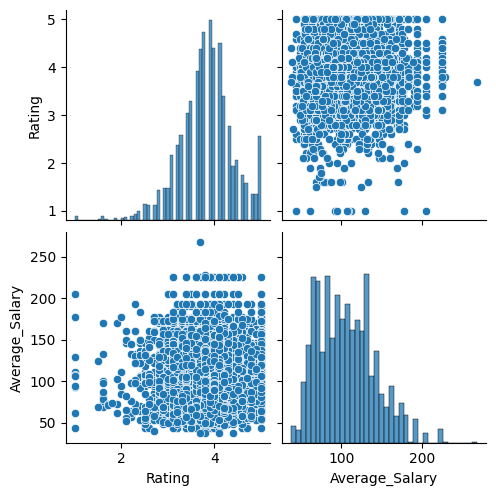

In [21]:
sns.pairplot(df_cleaned)

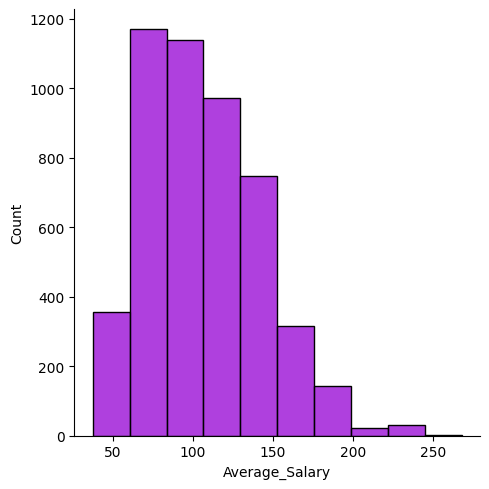

In [22]:
sns.displot(data= df_cleaned, x= "Average_Salary", bins = 10, color= "darkviolet")

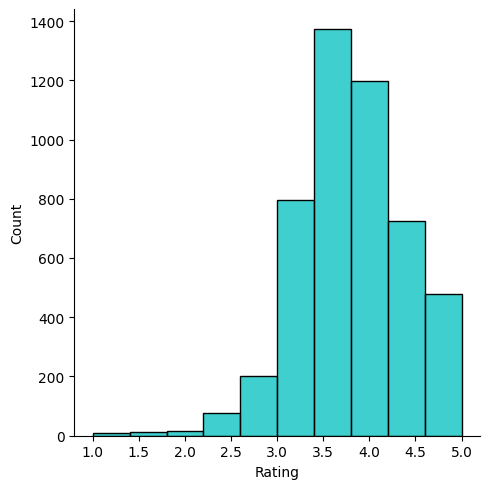

In [23]:
sns.displot(data= df_cleaned, x= "Rating", bins = 10, color= "c")

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'data scientist'),
  Text(1, 0, 'analyst'),
  Text(2, 0, 'researcher'),
  Text(3, 0, 'other'),
  Text(4, 0, 'data engineer'),
  Text(5, 0, 'manager'),
  Text(6, 0, 'machine learning engineer'),
  Text(7, 0, 'director'),
  Text(8, 0, 'deep learning engineer')])

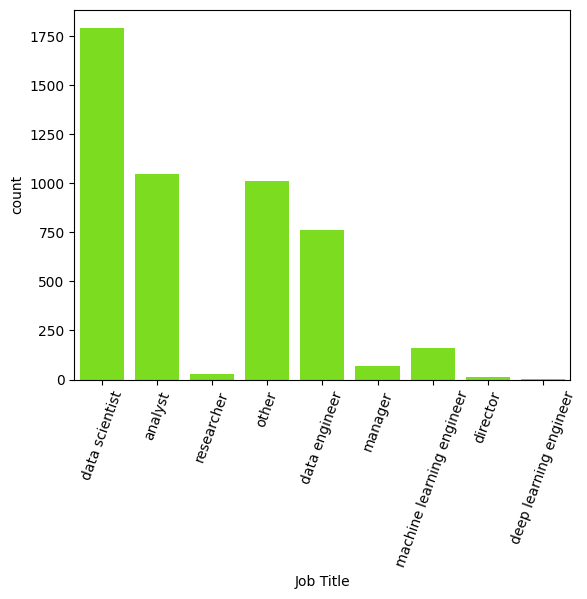

In [24]:
sns.countplot(data= df_cleaned, x= "Job Title", color= "lawngreen")
plt.xticks(rotation= 70)

<Axes: xlabel='Rating', ylabel='Average_Salary'>

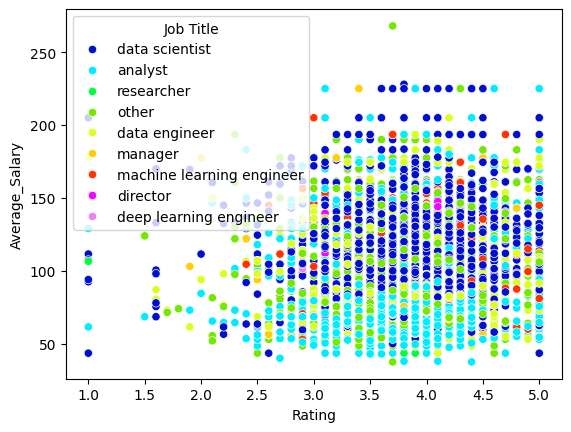

In [25]:
sns.scatterplot(data= df_cleaned, x= "Rating", y= "Average_Salary", hue= "Job Title", palette= "gist_ncar")

**Feature Engineering**

In [26]:
df_preprocessed = df_cleaned

In [27]:
en = LabelEncoder()

cols =  ["Job Title", "State"]

for col in cols:
    df_preprocessed[col] = en.fit_transform(df_preprocessed[col])

C:\Users\Hediye\AppData\Local\Temp\ipykernel_10764\1865833698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed[col] = en.fit_transform(df_preprocessed[col])
C:\Users\Hediye\AppData\Local\Temp\ipykernel_10764\1865833698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed[col] = en.fit_transform(df_preprocessed[col])


In [28]:
df_preprocessed.head(5)

,Job Title,Rating,Average_Salary,State
0,2,3.5,146.0,17
1,2,4.5,146.0,17
3,0,3.4,146.0,15
4,2,3.4,146.0,17
5,2,2.9,146.0,17


In [29]:
df_preprocessed["Average_Salary"].median()

102.0

In [30]:
def sat(x):
  if x >= 102:
    return(1)
  else:
    return(0)

In [31]:
df_preprocessed["Satisfaction"] = df_preprocessed["Average_Salary"].apply(sat)

C:\Users\Hediye\AppData\Local\Temp\ipykernel_10764\726102734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed["Satisfaction"] = df_preprocessed["Average_Salary"].apply(sat)


In [32]:
df_preprocessed["Satisfaction"]

0       1
1       1
3       1
4       1
5       1
       ..
5881    0
5882    0
5883    0
5886    0
5887    0
Name: Satisfaction, Length: 4891, dtype: int64

In [33]:
df_preprocessed.head(3)

,Job Title,Rating,Average_Salary,State,Satisfaction
0,2,3.5,146.0,17,1
1,2,4.5,146.0,17,1
3,0,3.4,146.0,15,1


In [34]:
X = df_preprocessed.drop(columns= ["Average_Salary", "Satisfaction"])
y = df_preprocessed["Satisfaction"]

**Modeling**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state= 75)

*LogisticRegression*

In [36]:
lg_model = LogisticRegression()

In [37]:
lg_model.fit(X_train, y_train)

LogisticRegression()

In [38]:
lg_prediction = lg_model.predict(X_test)
lg_prediction

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [39]:
y_test

2476    0
4091    1
57      1
4826    0
3361    0
       ..
652     1
1219    1
458     1
1302    1
2280    0
Name: Satisfaction, Length: 1712, dtype: int64

In [40]:
confusion_matrix(y_test, lg_prediction)

array([[496, 366],
       [407, 443]], dtype=int64)

In [41]:
print(classification_report(y_test, lg_prediction))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56       862
           1       0.55      0.52      0.53       850

    accuracy                           0.55      1712
   macro avg       0.55      0.55      0.55      1712
weighted avg       0.55      0.55      0.55      1712



In [42]:
accuracy_score(y_test, lg_prediction)

0.548481308411215

*KNN*

In [43]:
knn_model = KNeighborsClassifier()

In [44]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
knn_prediction = knn_model.predict(X_test)
knn_prediction

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [46]:
confusion_matrix(y_test, knn_prediction)

array([[559, 303],
       [305, 545]], dtype=int64)

In [47]:
accuracy_score(y_test, knn_prediction)

0.6448598130841121

In [48]:
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       862
           1       0.64      0.64      0.64       850

    accuracy                           0.64      1712
   macro avg       0.64      0.64      0.64      1712
weighted avg       0.64      0.64      0.64      1712



*Decision Tree*

In [49]:
dt_model = DecisionTreeClassifier()

In [50]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
dt_prediction = dt_model.predict(X_test)
dt_prediction

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [52]:
confusion_matrix(y_test, dt_prediction)

array([[573, 289],
       [316, 534]], dtype=int64)

In [53]:
accuracy_score(y_test, dt_prediction)

0.6466121495327103

In [54]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       862
           1       0.65      0.63      0.64       850

    accuracy                           0.65      1712
   macro avg       0.65      0.65      0.65      1712
weighted avg       0.65      0.65      0.65      1712



*Random Forest*

In [55]:
rf_model = RandomForestClassifier()

In [56]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
rf_prediction = rf_model.predict(X_test)
rf_prediction

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
confusion_matrix(y_test, rf_prediction)

array([[551, 311],
       [283, 567]], dtype=int64)

In [59]:
accuracy_score(y_test, rf_prediction)

0.6530373831775701

In [60]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       862
           1       0.65      0.67      0.66       850

    accuracy                           0.65      1712
   macro avg       0.65      0.65      0.65      1712
weighted avg       0.65      0.65      0.65      1712

